In [52]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv("C:/Users/ansha/OneDrive/Desktop/padaii/Datasets/quora.csv")
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
373566,373566,504393,504394,What are the changes you observe in people the...,What are the changes you observe in people the...,0
92799,92799,155288,42160,I want to increase my weight within 30 days. W...,How do I gain weight in a month?,0
344101,344101,472281,472282,Why sensor board nvr imposes a ban on movies l...,Where is the cross and dot product used in phy...,0
32587,32587,59962,59963,Who is the current chancellor of Germany?,What are the best restaurants near Hamilton Co...,0
61507,61507,107365,107366,What are Some of the best iphone gadgets?,What are the best iPhone gadgets on 2016?,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [55]:
df.duplicated().sum()

0

In [56]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [57]:
df.dropna(inplace=True)

In [58]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

### EDA

<Axes: xlabel='is_duplicate'>

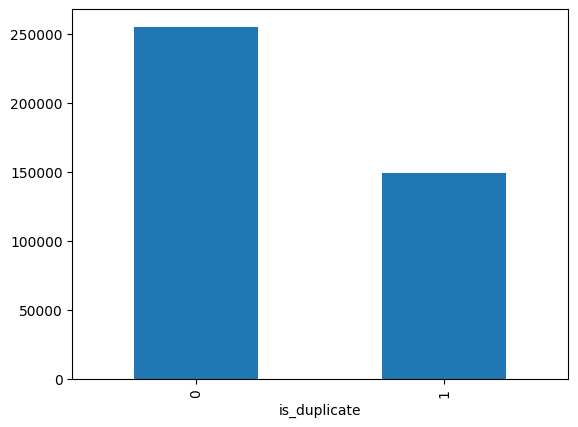

In [59]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [60]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
unique_q=np.unique(qid)
print("Total no. of questions: ",qid.shape[0])
print("No. of Unique questions: ",unique_q.shape[0])
x=qid.value_counts()>1
print("No. of questions repeating more than once: ",x[x].shape[0])

Total no. of questions:  808574
No. of Unique questions:  537929
No. of questions repeating more than once:  111778


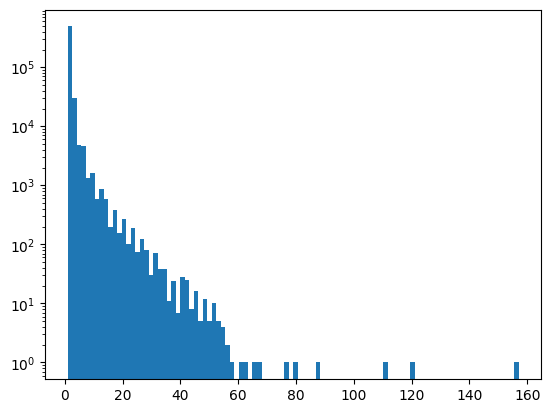

In [61]:
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

### Initial Model

In [62]:
sample_df=df.sample(10000,random_state=0)

<Axes: xlabel='is_duplicate'>

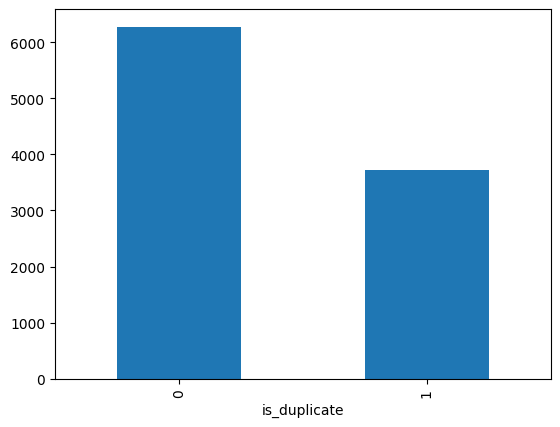

In [63]:
sample_df['is_duplicate'].value_counts().plot(kind='bar')

In [64]:
# LEN

sample_df['len_q1']=sample_df['question1'].str.len()
sample_df['len_q2']=sample_df['question2'].str.len()

In [65]:
sample_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2
187266,187266,285431,41214,What are some differences between German and A...,What are the cultural differences between Aust...,1,62,62
6557,6557,12839,12840,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?,1,38,47
139265,139265,27229,65241,What are the best books to prepare for SSB?,What are the best books to prepare for the IIT...,0,43,64
240137,240137,351894,351895,Is an MS in VLSI from Portland State Universit...,Which universities should I apply for an MS in...,0,123,52
3336,3336,6613,6614,Height: How would a 14 year old increase his h...,How should I increase my height?,1,52,32


In [66]:
# No. of Words

sample_df['no. of words in q1']=sample_df['question1'].apply(lambda row: len(row.split(" ")))
sample_df['no. of words in q2']=sample_df['question2'].apply(lambda row: len(row.split(" ")))

In [67]:
sample_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,no. of words in q1,no. of words in q2
187266,187266,285431,41214,What are some differences between German and A...,What are the cultural differences between Aust...,1,62,62,9,9
6557,6557,12839,12840,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?,1,38,47,7,8
139265,139265,27229,65241,What are the best books to prepare for SSB?,What are the best books to prepare for the IIT...,0,43,64,9,13
240137,240137,351894,351895,Is an MS in VLSI from Portland State Universit...,Which universities should I apply for an MS in...,0,123,52,24,10
3336,3336,6613,6614,Height: How would a 14 year old increase his h...,How should I increase my height?,1,52,32,10,6


In [68]:
def commonword(row):
    w1= set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2= set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [69]:
sample_df['common words']=sample_df.apply(commonword,axis=1)

In [70]:
sample_df.sample(2)

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,no. of words in q1,no. of words in q2,common words
24637,24637,45997,45998,What is the best way to detox the body?,How do I detox my body?,1,39,23,9,6,2
9458,9458,18369,18370,How can and how long can I preserve aloe vera ...,How do I know whether aloe vera gel is pure or...,0,73,51,14,12,5


In [71]:
def unique_word_total(row):
    w1= set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2= set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1)+len(w2)

In [72]:
sample_df['total_unique_words']=sample_df.apply(unique_word_total,axis=1)

In [73]:
sample_df.sample(2)

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,no. of words in q1,no. of words in q2,common words,total_unique_words
377209,377209,508476,508477,What is corporate accountability?,What is corporate accounting?,0,33,29,4,4,3,8
176310,176310,271293,93305,Where can I download Bad Blood of Taylor Swift?,Where can I download FLAC songs for free?,0,47,41,9,8,4,17


minimum characters 4
maximum characters 335
average num of characters 59


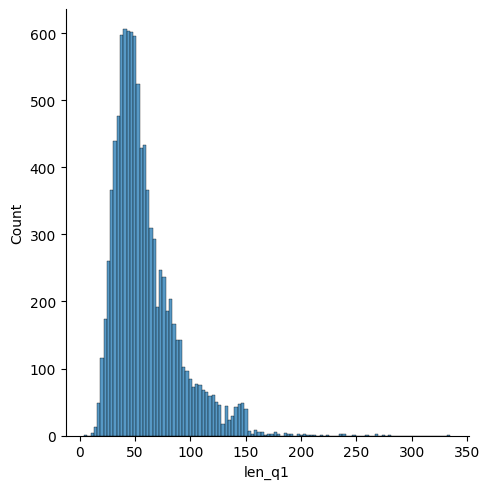

In [74]:
sns.displot(sample_df['len_q1'])
print('minimum characters',sample_df['len_q1'].min())
print('maximum characters',sample_df['len_q1'].max())
print('average num of characters',int(sample_df['len_q1'].mean()))

minimum characters 2
maximum characters 446
average num of characters 60


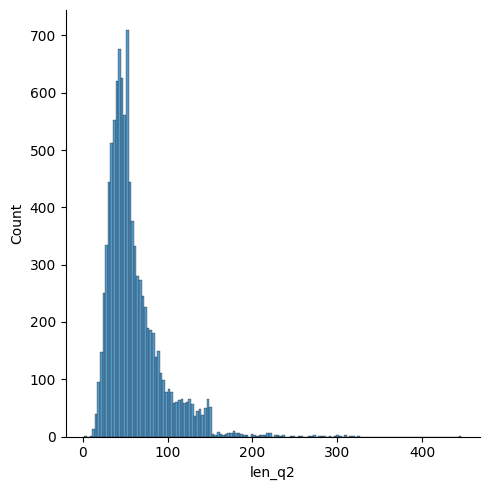

In [75]:
sns.displot(sample_df['len_q2'])
print('minimum characters',sample_df['len_q2'].min())
print('maximum characters',sample_df['len_q2'].max())
print('average num of characters',int(sample_df['len_q2'].mean()))

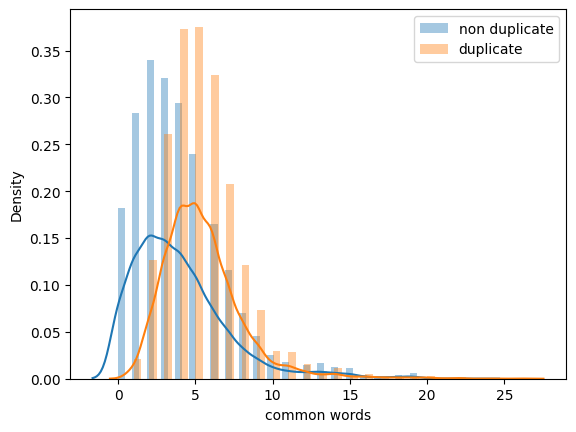

In [76]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(sample_df[sample_df['is_duplicate'] == 0]['common words'],label='non duplicate')
sns.distplot(sample_df[sample_df['is_duplicate'] == 1]['common words'],label='duplicate')
plt.legend()
plt.show()

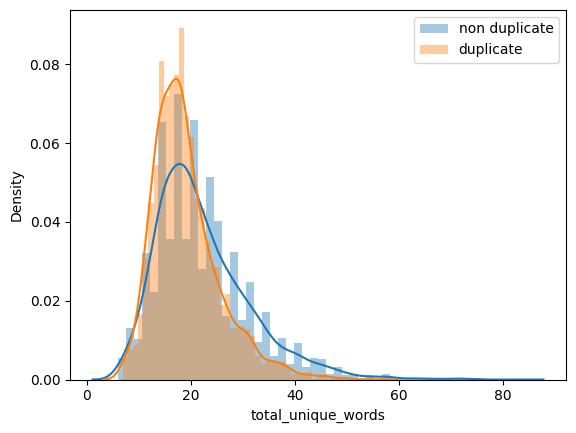

In [77]:
sns.distplot(sample_df[sample_df['is_duplicate'] == 0]['total_unique_words'],label='non duplicate')
sns.distplot(sample_df[sample_df['is_duplicate'] == 1]['total_unique_words'],label='duplicate')
plt.legend()
plt.show()

In [78]:
que_df=sample_df[['question1','question2']]
que_df

,question1,question2
187266,What are some differences between German and A...,What are the cultural differences between Aust...
6557,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?
139265,What are the best books to prepare for SSB?,What are the best books to prepare for the IIT...
240137,Is an MS in VLSI from Portland State Universit...,Which universities should I apply for an MS in...
3336,Height: How would a 14 year old increase his h...,How should I increase my height?
...,...,...
111439,How is the future scope in being an Android De...,What is the future growth in Android development?
261098,What are the most interesting hobbies for the ...,What is the best hobby?
138934,"Why is G20 a success to China and many, but a ...",Why are some movies a commercial success but g...
257041,What is the worst thing that someone has done ...,What is the worst thing that you have done?


In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
questions = list(que_df['question1'])+list(que_df['question2'])
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [80]:
temp_df1 = pd.DataFrame(q1_arr, index= que_df.index)
start_value = 3000
column_names = range(start_value, 6000)
temp_df2 = pd.DataFrame(q2_arr, index=que_df.index, columns=column_names)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
187266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [81]:
final_df=sample_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df

,is_duplicate,len_q1,len_q2,no. of words in q1,no. of words in q2,common words,total_unique_words
187266,1,62,62,9,9,5,18
6557,1,38,47,7,8,5,15
139265,0,43,64,9,13,8,21
240137,0,123,52,24,10,4,33
3336,1,52,32,10,6,3,16
...,...,...,...,...,...,...,...
111439,1,54,49,10,8,5,18
261098,0,53,23,9,5,2,13
138934,0,70,187,15,33,5,37
257041,0,86,43,19,9,7,27


In [82]:
final_df=pd.concat([final_df,temp_df],axis=1)
final_df

,is_duplicate,len_q1,len_q2,no. of words in q1,no. of words in q2,common words,total_unique_words,0,1,2,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
187266,1,62,62,9,9,5,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6557,1,38,47,7,8,5,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139265,0,43,64,9,13,8,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240137,0,123,52,24,10,4,33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3336,1,52,32,10,6,3,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111439,1,54,49,10,8,5,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261098,0,53,23,9,5,2,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138934,0,70,187,15,33,5,37,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257041,0,86,43,19,9,7,27,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [83]:
x=final_df.iloc[:,1:]
y=final_df.iloc[:,0]
x

,len_q1,len_q2,no. of words in q1,no. of words in q2,common words,total_unique_words,0,1,2,3,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
187266,62,62,9,9,5,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6557,38,47,7,8,5,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139265,43,64,9,13,8,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240137,123,52,24,10,4,33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3336,52,32,10,6,3,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111439,54,49,10,8,5,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261098,53,23,9,5,2,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138934,70,187,15,33,5,37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257041,86,43,19,9,7,27,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [84]:
x.columns=x.columns.astype(str)

In [85]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
accuracy_score(ytest,ypred)

0.7215

In [87]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred2=xgb.predict(xtest)
accuracy_score(ytest,ypred2)

0.7545